In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
from sklearn.preprocessing import LabelEncoder

read and encode the dependent variable

In [5]:
def read_data():   
    ds = pd.read_csv(r"C:\Users\Lenovo\jupyter project\rock and mines\rock and mines.csv")
    ds.head(5)
    X = ds[ds.columns[0:60]].values
    y = ds[ds.columns[60]]
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return(X, Y)

Define the encoder function

In [6]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels] = 1
    return one_hot_encode

Read the encoded dataset and Shuffle the dataset to mix up the rows

In [7]:
X, Y = read_data()
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state = 1)

(207, 60)


In [8]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=400)

In [9]:
X_train

array([[0.0257, 0.0447, 0.0388, ..., 0.0199, 0.0255, 0.018 ],
       [0.0067, 0.0096, 0.0024, ..., 0.0034, 0.0051, 0.0031],
       [0.0129, 0.0141, 0.0309, ..., 0.0017, 0.0024, 0.0029],
       ...,
       [0.0216, 0.0215, 0.0273, ..., 0.0024, 0.0009, 0.0017],
       [0.0216, 0.0124, 0.0174, ..., 0.0018, 0.0006, 0.0023],
       [0.0162, 0.0253, 0.0262, ..., 0.01  , 0.0048, 0.0019]])

In [10]:
Y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [11]:
x_test

array([[0.024 , 0.0218, 0.0324, ..., 0.0019, 0.0066, 0.0023],
       [0.0352, 0.0116, 0.0191, ..., 0.0015, 0.0073, 0.0067],
       [0.013 , 0.012 , 0.0436, ..., 0.0009, 0.0033, 0.0026],
       ...,
       [0.0664, 0.0575, 0.0842, ..., 0.0162, 0.0109, 0.0079],
       [0.0068, 0.0232, 0.0513, ..., 0.0052, 0.0194, 0.0105],
       [0.0274, 0.0242, 0.0621, ..., 0.0161, 0.022 , 0.0173]])

In [12]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

Define the parameters and variables to we=ork with tensor

In [13]:
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = (r"C:\Users\Lenovo\jupyter project\rock and mines")

n_dim 60


Define the number of hidden layers and the number of neurons for each layer

In [14]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
x= tf.placeholder(tf.float32,[None, n_dim])
y_ = tf.placeholder(tf.float32,[None, n_class])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))

Instructions for updating:
non-resource variables are not supported in the long term


Define the model

In [20]:
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activations
    layer_1 = tf.add(tf.matmul(x, weights['W1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with sigmoid activations
    layer_2 = tf.add(tf.matmul(layer_1, weights['W2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Hidden layer with sigmoid activations
    layer_3 = tf.add(tf.matmul(layer_2, weights['W3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # Hidden layer with RELU activations
    layer_4 = tf.add(tf.matmul(layer_3, weights['W4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activations
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

define the weights and the biases for each layer

In [21]:
weights = {
    'W1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'W2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'W3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'W4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
    }
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))}

Initialize all the variable

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
y = multilayer_perceptron(x, weights, biases)

Define the cost function and Gradient descent optimizer

In [24]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



calculate the cost and accuracy for each epoch

In [35]:
mse_history = []
accuracy_history = []
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:X_train, y_:Y_train})
    cost = sess.run(cost_function, feed_dict={x:X_train, y_:Y_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", (sess.run(accuracy, feed_dict={x:x_test, y_:y_test})))
    pred_y = sess.run(y, feed_dict={x:x_test} )
    mse = tf.reduce_mean(tf.square(pred_y - y_test))
    mse_ = sess.run(mse)
    accuracy = (sess.run(accuracy, feed_dict={x:X_train, y_:Y_train}))
    accuracy_history.append(accuracy)
    print('epoch: ', epoch,' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

Accuracy:  0.71428573
epoch:  0  -  cost:  0.33377898  - MSE:  3.912116363885515 - Train Accuracy:  0.875
Accuracy:  0.71428573
epoch:  1  -  cost:  0.366099  - MSE:  3.323525393691175 - Train Accuracy:  0.8680556
Accuracy:  0.6507937
epoch:  2  -  cost:  0.620581  - MSE:  6.8815786274922885 - Train Accuracy:  0.6944444
Accuracy:  0.42857143
epoch:  3  -  cost:  1.0904582  - MSE:  3.2341393542387733 - Train Accuracy:  0.4861111
Accuracy:  0.44444445
epoch:  4  -  cost:  0.7181383  - MSE:  0.8656827492769347 - Train Accuracy:  0.49305555
Accuracy:  0.6507937
epoch:  5  -  cost:  0.61575085  - MSE:  1.4957941515062163 - Train Accuracy:  0.6875
Accuracy:  0.71428573
epoch:  6  -  cost:  0.59762204  - MSE:  1.812652638359105 - Train Accuracy:  0.7152778
Accuracy:  0.6825397
epoch:  7  -  cost:  0.5807367  - MSE:  1.658613951072941 - Train Accuracy:  0.7430556
Accuracy:  0.6825397
epoch:  8  -  cost:  0.5628087  - MSE:  1.6173565895724087 - Train Accuracy:  0.7638889
Accuracy:  0.73015875
e

Accuracy:  0.73015875
epoch:  75  -  cost:  0.3676122  - MSE:  2.6404428358192766 - Train Accuracy:  0.8958333
Accuracy:  0.71428573
epoch:  76  -  cost:  0.32229492  - MSE:  2.4769293078164134 - Train Accuracy:  0.9236111
Accuracy:  0.6984127
epoch:  77  -  cost:  0.2912763  - MSE:  2.6784563131917856 - Train Accuracy:  0.9236111
Accuracy:  0.6825397
epoch:  78  -  cost:  0.2732122  - MSE:  2.807836751249847 - Train Accuracy:  0.9305556
Accuracy:  0.74603176
epoch:  79  -  cost:  0.2711226  - MSE:  3.4760851773959485 - Train Accuracy:  0.9027778
Accuracy:  0.73015875
epoch:  80  -  cost:  0.3166863  - MSE:  3.669496013729818 - Train Accuracy:  0.8680556
Accuracy:  0.71428573
epoch:  81  -  cost:  0.40204263  - MSE:  5.349469913176671 - Train Accuracy:  0.7777778
Accuracy:  0.53968257
epoch:  82  -  cost:  0.7247946  - MSE:  5.056982605238094 - Train Accuracy:  0.5972222
Accuracy:  0.50793654
epoch:  83  -  cost:  0.46081802  - MSE:  2.7720442426299337 - Train Accuracy:  0.7777778
Accu

epoch:  149  -  cost:  0.5776508  - MSE:  1.545486125074186 - Train Accuracy:  0.6736111
Accuracy:  0.6984127
epoch:  150  -  cost:  0.5244279  - MSE:  2.2931956959407707 - Train Accuracy:  0.6944444
Accuracy:  0.84126985
epoch:  151  -  cost:  0.49097002  - MSE:  3.0738895904816355 - Train Accuracy:  0.6875
Accuracy:  0.6507937
epoch:  152  -  cost:  0.61644256  - MSE:  1.838654002112504 - Train Accuracy:  0.6458333
Accuracy:  0.44444445
epoch:  153  -  cost:  1.4119328  - MSE:  11.16578094778138 - Train Accuracy:  0.4861111
Accuracy:  0.5714286
epoch:  154  -  cost:  0.91618663  - MSE:  1.2698207309747156 - Train Accuracy:  0.5208333
Accuracy:  0.50793654
epoch:  155  -  cost:  0.67258626  - MSE:  0.5461898314322036 - Train Accuracy:  0.5347222
Accuracy:  0.53968257
epoch:  156  -  cost:  0.6391318  - MSE:  0.5420390600398112 - Train Accuracy:  0.5694444
Accuracy:  0.50793654
epoch:  157  -  cost:  0.61787426  - MSE:  0.5754301191361192 - Train Accuracy:  0.625
Accuracy:  0.52380955


epoch:  223  -  cost:  0.46656144  - MSE:  1.2891828417453772 - Train Accuracy:  0.8055556
Accuracy:  0.6825397
epoch:  224  -  cost:  0.47640106  - MSE:  1.491116344740571 - Train Accuracy:  0.7361111
Accuracy:  0.7777778
epoch:  225  -  cost:  0.48593676  - MSE:  1.562777419848846 - Train Accuracy:  0.7430556
Accuracy:  0.5873016
epoch:  226  -  cost:  0.5332741  - MSE:  1.9148529971044794 - Train Accuracy:  0.6458333
Accuracy:  0.71428573
epoch:  227  -  cost:  0.51618373  - MSE:  1.6598733418481424 - Train Accuracy:  0.7361111
Accuracy:  0.50793654
epoch:  228  -  cost:  0.55990684  - MSE:  2.0997830427551043 - Train Accuracy:  0.625
Accuracy:  0.7619048
epoch:  229  -  cost:  0.4756811  - MSE:  1.7995689571519222 - Train Accuracy:  0.7777778
Accuracy:  0.6031746
epoch:  230  -  cost:  0.47339332  - MSE:  1.8898488817774142 - Train Accuracy:  0.75
Accuracy:  0.74603176
epoch:  231  -  cost:  0.44357017  - MSE:  1.9047869340195933 - Train Accuracy:  0.8055556
Accuracy:  0.61904764
e

Accuracy:  0.6666667
epoch:  297  -  cost:  0.42218602  - MSE:  1.2748419003017153 - Train Accuracy:  0.8402778
Accuracy:  0.6825397
epoch:  298  -  cost:  0.407175  - MSE:  1.3657578630560796 - Train Accuracy:  0.8541667
Accuracy:  0.74603176
epoch:  299  -  cost:  0.39216152  - MSE:  1.4317091423087187 - Train Accuracy:  0.8611111
Accuracy:  0.74603176
epoch:  300  -  cost:  0.37944645  - MSE:  1.4652558159562348 - Train Accuracy:  0.875
Accuracy:  0.7619048
epoch:  301  -  cost:  0.36631328  - MSE:  1.6311079360337881 - Train Accuracy:  0.875
Accuracy:  0.74603176
epoch:  302  -  cost:  0.35318473  - MSE:  1.815351382521548 - Train Accuracy:  0.8819444
Accuracy:  0.7777778
epoch:  303  -  cost:  0.33875316  - MSE:  2.110777676269797 - Train Accuracy:  0.8888889
Accuracy:  0.7777778
epoch:  304  -  cost:  0.3208807  - MSE:  2.585515701276149 - Train Accuracy:  0.9027778
Accuracy:  0.7936508
epoch:  305  -  cost:  0.30818674  - MSE:  2.724703378639291 - Train Accuracy:  0.9097222
Accu

Accuracy:  0.8095238
epoch:  371  -  cost:  0.1131867  - MSE:  16.178571958501838 - Train Accuracy:  0.9444444
Accuracy:  0.7936508
epoch:  372  -  cost:  0.13202208  - MSE:  11.168232590265276 - Train Accuracy:  0.9444444
Accuracy:  0.7936508
epoch:  373  -  cost:  0.1402447  - MSE:  18.14235579006503 - Train Accuracy:  0.9513889
Accuracy:  0.74603176
epoch:  374  -  cost:  0.18920057  - MSE:  9.948554231076667 - Train Accuracy:  0.9097222
Accuracy:  0.7619048
epoch:  375  -  cost:  0.27219394  - MSE:  21.357620207135948 - Train Accuracy:  0.875
Accuracy:  0.53968257
epoch:  376  -  cost:  0.6673658  - MSE:  6.317142207383456 - Train Accuracy:  0.6527778
Accuracy:  0.71428573
epoch:  377  -  cost:  0.5896615  - MSE:  19.227482690681107 - Train Accuracy:  0.7291667
Accuracy:  0.53968257
epoch:  378  -  cost:  0.7164211  - MSE:  3.9996546596131415 - Train Accuracy:  0.5902778
Accuracy:  0.7619048
epoch:  379  -  cost:  0.33395734  - MSE:  2.910269633240208 - Train Accuracy:  0.8611111
A

Accuracy:  0.7619048
epoch:  445  -  cost:  0.28194872  - MSE:  26.565075186117067 - Train Accuracy:  0.8888889
Accuracy:  0.5555556
epoch:  446  -  cost:  0.5583646  - MSE:  8.048427275057373 - Train Accuracy:  0.6944444
Accuracy:  0.71428573
epoch:  447  -  cost:  0.24830474  - MSE:  14.626647103554276 - Train Accuracy:  0.8958333
Accuracy:  0.73015875
epoch:  448  -  cost:  0.14782868  - MSE:  7.538575285547935 - Train Accuracy:  0.9513889
Accuracy:  0.84126985
epoch:  449  -  cost:  0.07579046  - MSE:  11.315745120509204 - Train Accuracy:  0.9861111
Accuracy:  0.82539684
epoch:  450  -  cost:  0.06507107  - MSE:  11.288501665070068 - Train Accuracy:  0.9861111
Accuracy:  0.82539684
epoch:  451  -  cost:  0.058941737  - MSE:  12.111071451679688 - Train Accuracy:  0.9861111
Accuracy:  0.84126985
epoch:  452  -  cost:  0.054536343  - MSE:  12.276413390821402 - Train Accuracy:  0.9861111
Accuracy:  0.84126985
epoch:  453  -  cost:  0.050483927  - MSE:  12.691230435268961 - Train Accura

epoch:  521  -  cost:  0.007277709  - MSE:  24.02669831357407 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  522  -  cost:  0.007169582  - MSE:  24.33890491008374 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  523  -  cost:  0.0070848623  - MSE:  24.25163208342013 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  524  -  cost:  0.0069824373  - MSE:  24.511213774129192 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  525  -  cost:  0.0069045713  - MSE:  24.482955517929273 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  526  -  cost:  0.0068106866  - MSE:  24.677861895151377 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  527  -  cost:  0.0067320615  - MSE:  24.682373743868492 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  528  -  cost:  0.0066533918  - MSE:  24.822162405837144 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  529  -  cost:  0.006576573  - MSE:  24.80046111639391 - Train Accuracy:  1.0
Accuracy:  0.8095238
epoch:  530  -  cost:  0.0065050116

epoch:  597  -  cost:  0.0034915188  - MSE:  30.101607452772594 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  598  -  cost:  0.0034647968  - MSE:  30.21567771044368 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  599  -  cost:  0.0034402749  - MSE:  30.271096866871815 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  600  -  cost:  0.0034186116  - MSE:  30.31422834733308 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  601  -  cost:  0.0033920177  - MSE:  30.387811989246554 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  602  -  cost:  0.0033717833  - MSE:  30.43665844277368 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  603  -  cost:  0.0033488749  - MSE:  30.451435026564734 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  604  -  cost:  0.0033246707  - MSE:  30.529872408848647 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  605  -  cost:  0.0033061951  - MSE:  30.560442050328692 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  606  -  cost: 

epoch:  673  -  cost:  0.0022646342  - MSE:  33.47548336731988 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  674  -  cost:  0.002252899  - MSE:  33.55226974347817 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  675  -  cost:  0.0022427957  - MSE:  33.53902833205512 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  676  -  cost:  0.002231749  - MSE:  33.62480565800031 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  677  -  cost:  0.0022206467  - MSE:  33.6282753393745 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  678  -  cost:  0.0022103542  - MSE:  33.696694271726635 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  679  -  cost:  0.0022008047  - MSE:  33.68415978817759 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  680  -  cost:  0.0021899876  - MSE:  33.776128913355855 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  681  -  cost:  0.0021794438  - MSE:  33.77839093713338 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  682  -  cost:  0.0021

Accuracy:  0.84126985
epoch:  749  -  cost:  0.0016637576  - MSE:  36.02572405515151 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  750  -  cost:  0.0016588492  - MSE:  36.00442626101893 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  751  -  cost:  0.0016522721  - MSE:  36.063463906635846 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  752  -  cost:  0.0016469352  - MSE:  36.106107026753456 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  753  -  cost:  0.0016412768  - MSE:  36.11146611268713 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  754  -  cost:  0.0016355988  - MSE:  36.15949459706721 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  755  -  cost:  0.0016305478  - MSE:  36.16222053959638 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  756  -  cost:  0.0016246005  - MSE:  36.21663292951006 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  757  -  cost:  0.001619265  - MSE:  36.225097622728235 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoc

Accuracy:  0.84126985
epoch:  825  -  cost:  0.0013135843  - MSE:  37.83130459314449 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  826  -  cost:  0.0013096817  - MSE:  37.854290663059416 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  827  -  cost:  0.0013058113  - MSE:  37.88318615654364 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  828  -  cost:  0.0013021824  - MSE:  37.90388597576625 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  829  -  cost:  0.0012984467  - MSE:  37.90001112476618 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  830  -  cost:  0.0012946606  - MSE:  37.94671947587456 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  831  -  cost:  0.0012909179  - MSE:  37.95360092241692 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  832  -  cost:  0.0012870702  - MSE:  37.97359945293527 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  833  -  cost:  0.0012834538  - MSE:  37.98915229631792 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch

Accuracy:  0.84126985
epoch:  901  -  cost:  0.0010711824  - MSE:  39.21868884647419 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  902  -  cost:  0.0010683486  - MSE:  39.229882928053044 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  903  -  cost:  0.001065658  - MSE:  39.24702481679926 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  904  -  cost:  0.0010631006  - MSE:  39.26340329652951 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  905  -  cost:  0.0010604492  - MSE:  39.2721372898012 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  906  -  cost:  0.0010577894  - MSE:  39.293511550676584 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  907  -  cost:  0.001055062  - MSE:  39.30312529737828 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  908  -  cost:  0.0010525956  - MSE:  39.3330502422924 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  909  -  cost:  0.0010497525  - MSE:  39.34034356584361 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  

Accuracy:  0.84126985
epoch:  977  -  cost:  0.00089303486  - MSE:  40.39086191824872 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  978  -  cost:  0.0008909907  - MSE:  40.397552177192054 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  979  -  cost:  0.00088910037  - MSE:  40.40658951238724 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  980  -  cost:  0.00088703644  - MSE:  40.435886265540766 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  981  -  cost:  0.0008850002  - MSE:  40.442610231060094 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  982  -  cost:  0.0008831744  - MSE:  40.4658561689642 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  983  -  cost:  0.00088132237  - MSE:  40.46170081529919 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  984  -  cost:  0.000879204  - MSE:  40.49321709677508 - Train Accuracy:  1.0
Accuracy:  0.84126985
epoch:  985  -  cost:  0.0008772843  - MSE:  40.502500919727744 - Train Accuracy:  1.0
Accuracy:  0.84126985


In [36]:
save_path = saver.save(sess, model_path)
print("Model saved in file: %s", save_path)

Model saved in file: %s C:\Users\Lenovo\jupyter project\rock and mines


plot mse and accuracy graph

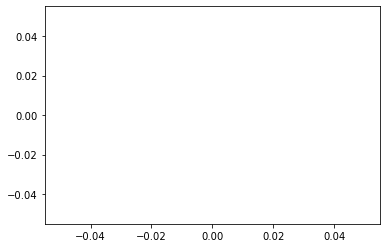

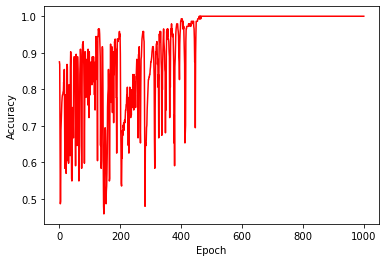

In [37]:
import matplotlib.pyplot as plt
plt.plot(mse_history, "r")
plt.show()
plt.plot(accuracy_history, "r")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

print the final accuracy

In [38]:
correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x:x_test, y_:y_test} )))

Test Accuracy:  0.84126985


print the final mean square error

In [39]:
pred_y = sess.run(y, feed_dict={x:x_test})
mse = tf.reduce_mean(tf.square(pred_y - y_test))
print("MSE: %.4f" % sess.run(mse))

MSE: 40.6976
